#Actividad Guiada 1 de Algoritmos de Optimizacion

##Nombre: Néstor Campos Gestal

Link: https://colab.research.google.com/drive/1K4gyTwDTK4qKmrhQVWj90515gG8_MoPJ?usp=sharing

Github: https://github.com/nestorcamposgestal/03MIAR---Algoritmos-de-Optimizacion---Nestor

## 1. Desarrollo de algoritmo con la técnica de divide y vencerás (Torres de Hanoi)

La técnica de divide y vencerás consiste en resolver el problema principal a partir de las soluciones que proporcionan los subproblemas del mismo tipo pero de menor tamaño. En algún momento, mediante el proceso de hacer más pequeños los subproblemas, llegamos a una solución sencilla o trivial. En este tipo de algoritmos se hace evidente el uso de la recursividad.

El juego que se propone en este caso, en su forma más tradicional, consiste en tres postes verticales. En uno de los postes se apila un número indeterminado de discos perforados por su centro, que determinará la complejidad de la solución. Los discos se apilan sobre uno de los postes en tamaño decreciente de abajo arriba. No hay dos discos iguales, y todos ellos están apilados de mayor a menor radio -desde la base del poste hacia arriba- en uno de los postes, quedando los otros dos postes vacíos. El juego consiste en pasar todos los discos desde el poste ocupado (es decir, el que posee la torre) a uno de los otros postes vacíos. Para realizar este objetivo, es necesario seguir tres simples reglas:

* Solo se puede mover un disco cada vez y para mover otro los demás tienen que estar en postes.
* Un disco de mayor tamaño no puede estar sobre uno más pequeño que él mismo.
* Solo se puede desplazar el disco que se encuentre arriba en cada poste.

Existen diversas formas de llegar a la solución final, todas ellas siguiendo estrategias diversas.

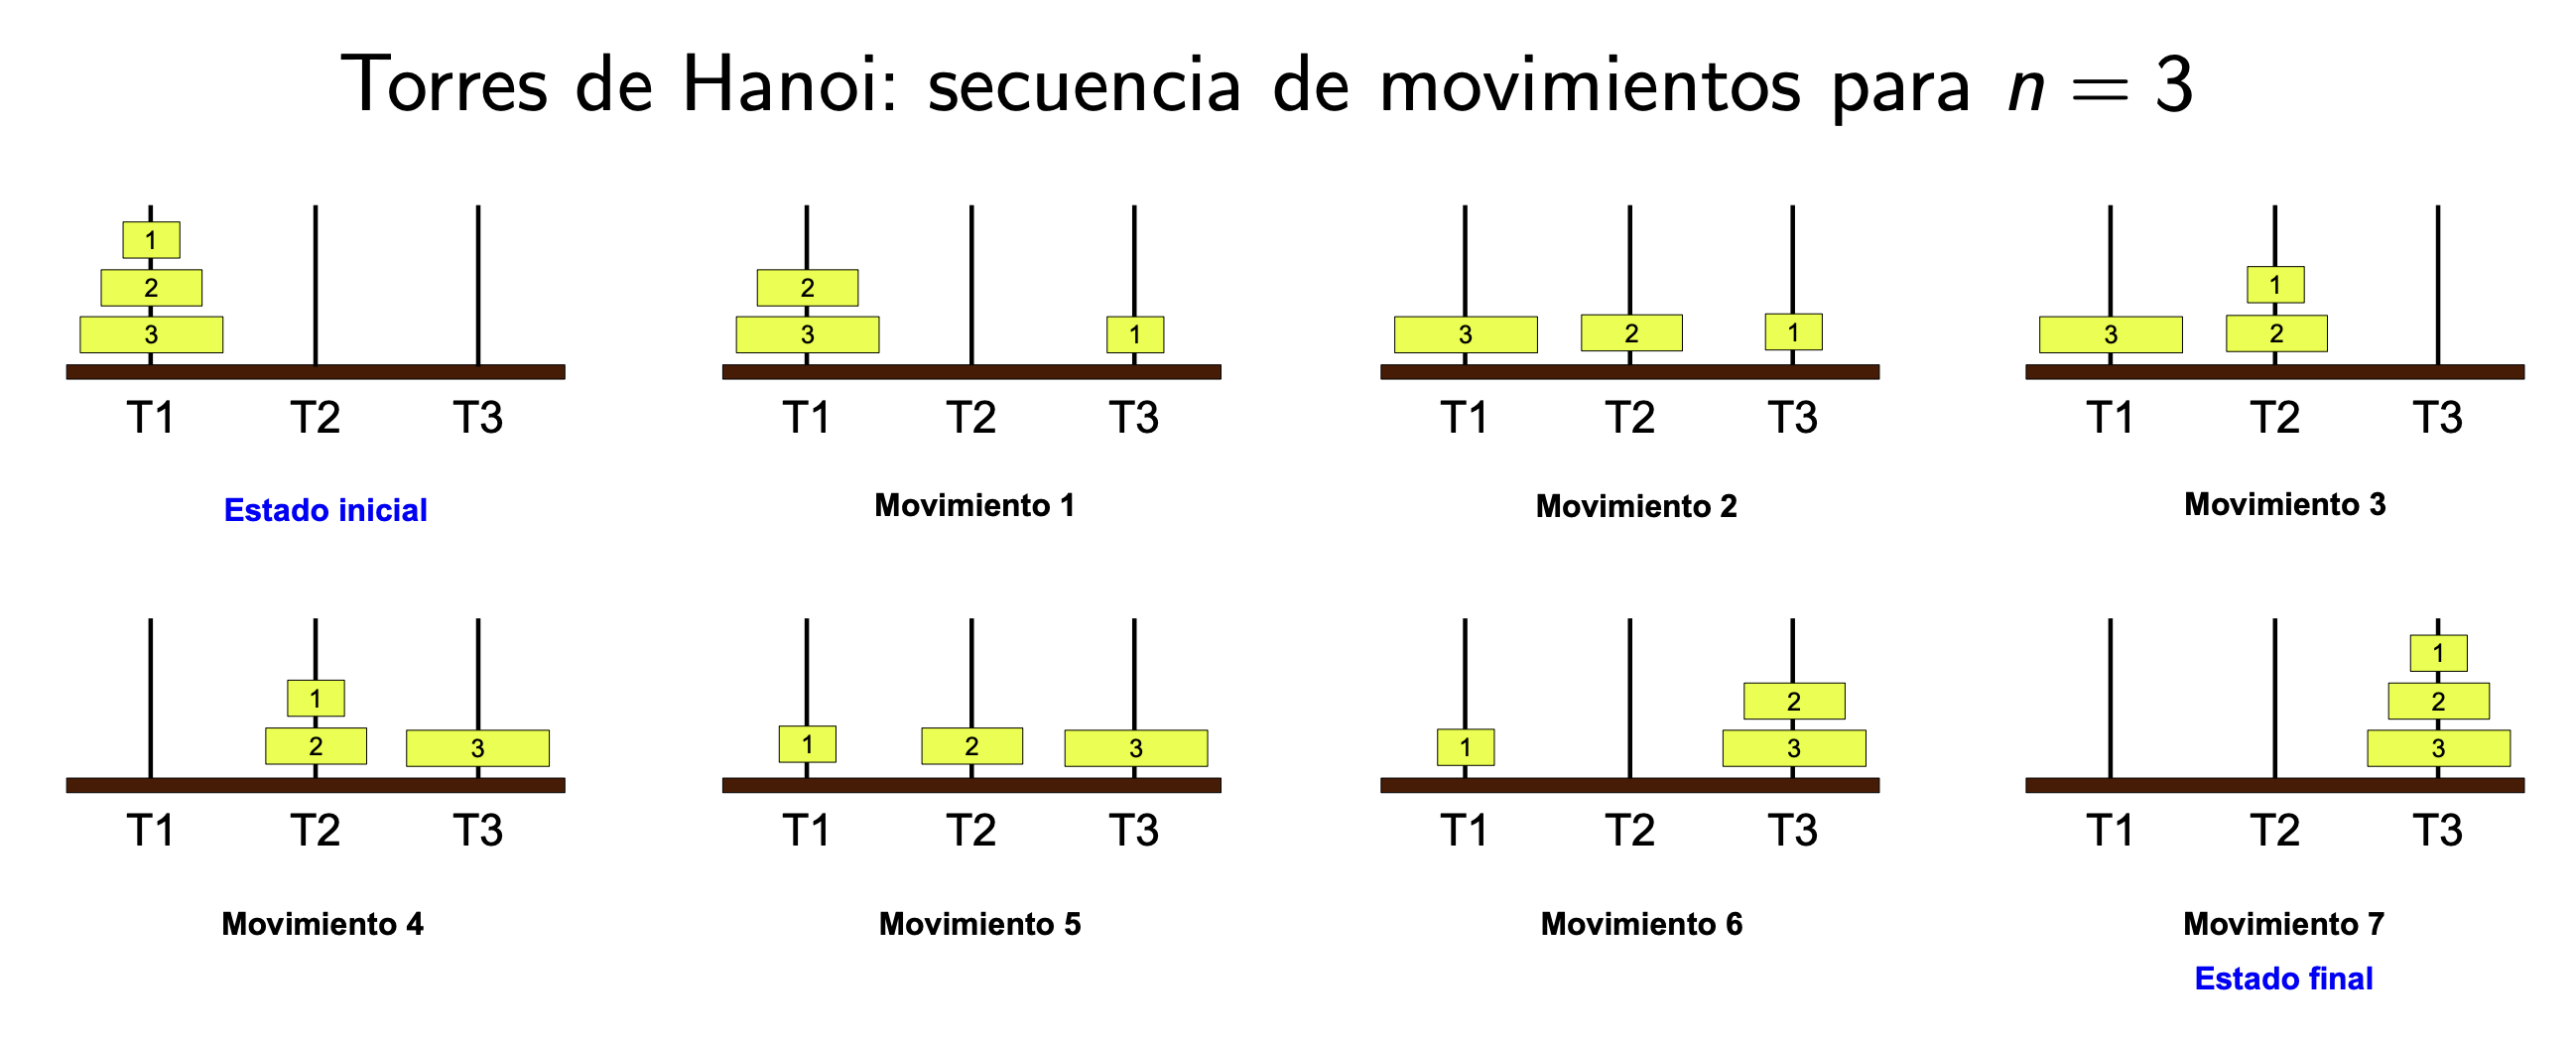

In [1]:
#Torres de Hanoi - Divide y venceras
################################################################
def Torres_Hanoi(N, desde, hasta):
  #N - Nº de fichas
  #desde - torre inicial
  #hasta - torre final
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    # Movemos nueva ficha a torre pivote
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

Torres_Hanoi(3, 1, 3)
################################################################

Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


Cuando hacemos la llamada recursiva, tenemos que mover la nueva ficha a la torre que hace de pivote, en este caso si tenemos en las siguientes torres fichas, la torre pivote será la siguiente:

*   1,3 -> 2
*   1,2 -> 3
*   2,3 -> 1

De ahí sale la operación de `6-desde-hasta`

In [2]:
#Torres de Hanoi - Divide y venceras. Otra implementación entrando un pivot
################################################################
def Torres_Hanoi_2(n, source, pivot, target):
    if n == 1:
        print("Mueve ficha 1 desde", source, "a", target)
        return
    Torres_Hanoi_2(n - 1, source, target, pivot)
    print("Mueve ficha", n, "desde", source, "a", target)
    Torres_Hanoi_2(n - 1, pivot, source, target)
################################################################

Torres_Hanoi_2(3, 1, 2, 3)

Mueve ficha 1 desde 1 a 3
Mueve ficha 2 desde 1 a 2
Mueve ficha 1 desde 3 a 2
Mueve ficha 3 desde 1 a 3
Mueve ficha 1 desde 2 a 1
Mueve ficha 2 desde 2 a 3
Mueve ficha 1 desde 1 a 3


## 2. Desarrollo de algoritmo voraz para resolver problemas (devolución de cambio)

La estrategia en este tipo de algoritmos consiste en trabajar por etapas, eligiendo en cada etapa una decisión para construir la solución que resulte más adecuada en ese momento sin considerar las consecuencias futuras. Las posibles soluciones no consideradas en la decisión serán descartadas para siempre.

Consta de los siguientes elementos:
* Un problema con entradas para las que existe un conjunto de candidatos como solución.
  * En este ejemplo: Todas las combinaciones posibles de obtener C
* Una función de selección que en cada paso determina el mejor candidato para formar parte de la solución de entre los que no han sido descartados.
  * En este ejemplo: en cada etapa, tomar tantas monedas como sea posible del mayor valor, sin pasarse (voracidad)
* Una función (función de factibilidad) que comprueba si un determinado subconjunto de candidatos es prometedor para encontrar la solución. Es prometedor si es posible seguir adelante añadiendo candidatos en las siguientes etapas sin violar ninguna restricción.
  * En este ejemplo: es el valor alcanzado con la suma de todas las monedas elegidas hasta el momento
* Una función objetivo que en cada paso puede ofrecer un valor de la solución propuesta. Es la función que queremos maximizar o minimizar.
  * En este ejemplo: es la cantidad total de monedas(función a minimizar)
* Una función (funcion solución) que comprueba si un subconjunto de entradas es una posible solución al problema.
 * En este ejemplo: similar(en este caso) que la función de factibilidad pero que debe coincidir con C.

In [3]:
#Cambio de monedas - Técnica voraz
################################################################################

sistema = [12, 5 ,2, 1 ] # Indica el sistema monetario, es decir, en este caso hay monedas de 12, 5, 2 y 1

################################################################
def cambio_monedas(cantidad,sistema):
  solucion = [0]*len(sistema)
  valor_acumulado = 0

  for i,valor in enumerate(sistema):
    monedas = (cantidad-valor_acumulado)//valor # // Se queda solo con la parte entera, es decir, 7,5 = 7
    solucion[i] = monedas
    valor_acumulado = valor_acumulado + monedas*valor

    if cantidad == valor_acumulado:
      return solucion

  print("No es posible encontrar solucion")
################################################################

cambio_monedas(15,sistema)

[1, 0, 1, 1]

In [4]:
#Cambio de monedas - Técnica voraz. Otra implementación
################################################################################
def cambio_monedas(cantidad, sistema):
  # cantidad a cambiar
  # sistema: valor de las monedas diferente, ordenado de mayor valor a menor
  solucion = {}
  for v in sistema:
    monedas = cantidad // v # // Se queda solo con la parte entera, es decir, 7,5 = 7
    solucion[v] = monedas
    cantidad -= monedas * v
    if cantidad == 0:
      return solucion
################################################################

cambio_monedas(123,[25,10,5,1])

{25: 4, 10: 2, 5: 0, 1: 3}

## 3. Desarrollo de algoritmo con la técnica de vuelta atrás (backtracking)(N-Reinas)

El funcionamiento de este algoritmo es que a medida que avanzamos por el árbol desde la raíz, vamos construyendo las posibles soluciones. Puede ocurrir que llegados a un nodo, se verifique que dicha rama nunca proporcionará una solución. En ese caso, lo descartaremos y volveremos hacia atrás (acción que da nombre a la técnica) en el árbol hasta el nodo en el que aún podamos encontrar posibles soluciones. En otro caso, podemos llegar a una hoja (nodo final) que podamos verificar que es una solución al problema. La registraremos con su coste (el valor de aplicar la función de coste) y continuaremos la exploración de nuevo con vuelta atrás.

Para este caso de las **N-Reinas**, la solución estará representada por vectores de dimensión 4, donde cada una de las posiciones indica la columna, y el valor (de 1 a 4) indica la fila correspondiente donde se sitúa cada reina. La implementación del algoritmo para obtener una solución recorre un árbol de expansión en el que los niveles del árbol representan las posibles situaciones de las reinas en cada columna del tablero. De esta manera, es sencillo determinar en cada nodo si puede ser o no solución.

Para saber si puede ser una solución o no, se hacen las siguientes comprobaciones:
* No puede haber dos reinas en la misma columna, es decir, en cada coordenada del vector solo puede haber un valor.
* En cada fila tampoco puede haber más de una reina. Esta restricción la podemos verificar con una función que descarte una rama en la que se ha repetido un valor.
* Debemos descartar también las amenazas a través de diagonales. Si analizamos las coordenadas que están determinadas por las filas y las columnas, veremos que dos reinas están en la misma diagonal si, siendo sus posiciones $(x_1 , y_1)$ y $(x2 , y2)$, se cumple que $|x_1 – y_1| = |x_2 – y_2|$ (el valor absoluto de la diferencia de sus coordenadas coincide).

In [5]:
#N Reinas - Vuelta Atrás()
################################################################################

#Verifica que en la solución parcial no hay amenzas entre reinas
################################################################
def es_prometedora(SOLUCION,etapa):
################################################################
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:       
      return False
  
    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

#Traduce la solución al tablero
################################################################
def escribe_solucion(S):
################################################################
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")



#Proceso principal de N-Reinas
################################################################
def reinas(N, solucion=[],etapa=0): 
################################################################
  if len(solucion) == 0:         # Inicializar solucion
    solucion = [0 for i in range(N) ]
  
  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:  
        reinas(N, solucion, etapa+1)
    else:
      None
  
  solucion[etapa] = 0
################################################################

reinas(4,solucion=[],etapa=0)

[2, 4, 1, 3]
[3, 1, 4, 2]


In [6]:
escribe_solucion([3, 1, 4, 2])


 -  X  -  - 
 -  -  -  X 
 X  -  -  - 
 -  -  X  - 

## 4. Desarrollo de algoritmo con Programación dinámica (paseo por el rio)

La programación dinámica se basa en que es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.

En este problema hay un río hay n embarcaderos y debemos desplazarnos río abajo (no hay posibilidad de remontar) desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

Consideramos una tabla $T(i,j)$ para almacenar todos los precios que nos ofrece el embarcadero i hasta cualquier otro embarcadero. Si no es posible desplazarse desde un embarcadero a otro, entonces configuramos un valor grande en T para asegurarnos de que este trayecto nunca se elegirá.

Estableceremos una tabla intermedia $P(i,j)$ para guardar soluciones óptimas parciales para ir desde i a j.

Como en todos los problemas de programación dinámica, necesitaremos construir una tabla para almacenar los valores intermedios. La naturaleza del problema nos permite definir una función de recursividad de la siguiente manera para i diferente de j:

$$P(i,j) = min [C(i,k) + C (k, j), C (i, k)]$$
para todo $k$ entre $i$ y $j$

Esto quiere decir intuitivamente que el coste mínimo para ir de i a j es el mínimo entre de todas las posibilidades de ir de i a j por algún embarcadero intermedio, incluido el propio trayecto directo de i a j.

In [7]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf")


#Calculo de la matriz de PRECIOS y RUTAS
################################################################  
def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios y ruta
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i         
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA
################################################################  

PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i])  
  
#Calculo de la ruta con Recursividad
################################################################  
def calcular_ruta(RUTA, desde, hasta):
################################################################  
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return "" 
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              ) 
################################################################  

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6)  

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'